# Going Deeper #4: Vocabulary Size를 변경해서 시도해보기

단어의 수에 따라서 모델의 성능이 어떻게 변하는지 테스트해 봅시다.

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### 1. 모든 단어 사용

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [3]:
# 전체 클래스 종류
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


In [4]:
# 원래 뉴스 데이터 복원
# 제공 딕셔너리 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [5]:
# 인덱스 값 제정의
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [6]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [7]:
# 데이터를 텍스트로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [8]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [9]:
# 확인
x_train[:1]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [10]:
# 확인
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3']

In [15]:
len(index_to_word)

30982

In [11]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [13]:
# tf-idf 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [14]:
# 테스트 데이터 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 26506)


In [16]:
# 나이브베이즈 분류
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [17]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [18]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
nb_acc = accuracy_score(y_test, predicted)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [19]:
# f1 score, confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
print(classification_report(y_test, mod.predict(tfidfv_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [21]:
# 컴플리트 나이브 베이지안 cnb
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [23]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
cb_acc = accuracy_score(y_test, predicted)
print("정확도:", cb_acc) #예측값과 실제값 비교

정확도: 0.7649154051647373


In [24]:
# 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [25]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
lr_acc = accuracy_score(y_test, predicted)
print("정확도:", lr_acc) #예측값과 실제값 비교

정확도: 0.813446126447017


In [26]:
# 선형 서포트벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [27]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
lsvc_acc = accuracy_score(y_test, predicted)
print("정확도:", lsvc_acc) #예측값과 실제값 비교

정확도: 0.7773820124666073


In [28]:
# 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [29]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
tree_acc = accuracy_score(y_test, predicted)
print("정확도:", tree_acc) #예측값과 실제값 비교

정확도: 0.6211041852181657


In [30]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [31]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
forest_acc = accuracy_score(y_test, predicted)
print("정확도:", forest_acc) #예측값과 실제값 비교

정확도: 0.6544968833481746


In [32]:
# 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [33]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
grbt_acc = accuracy_score(y_test, predicted)
print("정확도:", grbt_acc) #예측값과 실제값 비교

정확도: 0.7702582368655387


In [34]:
# 로지스틱, cnb, 그래디언트 부스팅 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [35]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
voting_acc = accuracy_score(y_test, predicted)
print("정확도:", voting_acc) #예측값과 실제값 비교

정확도: 0.8187889581478184


<AxesSubplot:>

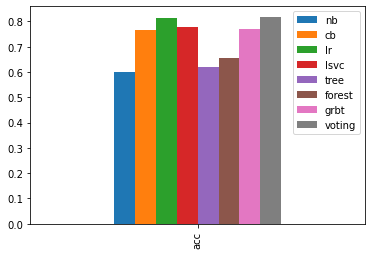

In [46]:
acc_models = {'nb':nb_acc, 
              'cb':cb_acc, 
              'lr':lr_acc, 
              'lsvc':lsvc_acc, 
              'tree':tree_acc, 
              'forest':forest_acc, 
              'grbt':grbt_acc,
              'voting':voting_acc}
pd.DataFrame(acc_models, index=['acc']).plot.bar()

---
### 2. 빈도수 상위 5,000개의 단어만 사용

In [47]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [48]:
# 원래 뉴스 데이터 복원
# 제공 딕셔너리 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [49]:
# 인덱스 값 제정의
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [50]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [51]:
# 데이터를 텍스트로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [52]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [53]:
# 확인
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [54]:
# 확인
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [55]:
len(index_to_word)

30982

In [56]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [58]:
# tf-idf 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [59]:
# 테스트 데이터 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 4867)


In [61]:
# 나이브 베이즈
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [62]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
nb_acc = accuracy_score(y_test, predicted)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6731967943009796


In [63]:
# 컴플리트 나이브 베이지안 cnb
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [64]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
cb_acc = accuracy_score(y_test, predicted)
print("정확도:", cb_acc) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [65]:
# 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [66]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
lr_acc = accuracy_score(y_test, predicted)
print("정확도:", lr_acc) #예측값과 실제값 비교

정확도: 0.8058771148708815


In [67]:
# 선형 서포트벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [68]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
lsvc_acc = accuracy_score(y_test, predicted)
print("정확도:", lsvc_acc) #예측값과 실제값 비교

정확도: 0.7666963490650045


In [69]:
# 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [70]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
tree_acc = accuracy_score(y_test, predicted)
print("정확도:", tree_acc) #예측값과 실제값 비교

정확도: 0.6179875333926982


In [71]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [72]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
forest_acc = accuracy_score(y_test, predicted)
print("정확도:", forest_acc) #예측값과 실제값 비교

정확도: 0.701246660730187


In [73]:
# 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [74]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
grbt_acc = accuracy_score(y_test, predicted)
print("정확도:", grbt_acc) #예측값과 실제값 비교

정확도: 0.767586821015138


In [75]:
# 로지스틱, cnb, 그래디언트 부스팅 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [76]:
Apredicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
voting_acc = accuracy_score(y_test, predicted)
print("정확도:", voting_acc) #예측값과 실제값 비교

정확도: 0.767586821015138


<AxesSubplot:>

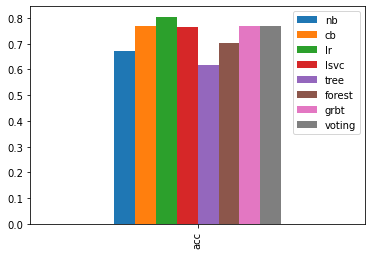

In [78]:
acc_models = {'nb':nb_acc, 
              'cb':cb_acc, 
              'lr':lr_acc, 
              'lsvc':lsvc_acc, 
              'tree':tree_acc, 
              'forest':forest_acc, 
              'grbt':grbt_acc,
              'voting':voting_acc}
pd.DataFrame(acc_models, index=['acc']).plot.bar()

In [80]:
pd.DataFrame(acc_models, index=['acc'])

,nb,cb,lr,lsvc,tree,forest,grbt,voting
acc,0.673197,0.770703,0.805877,0.766696,0.617988,0.701247,0.767587,0.767587


---
### 3. 직접 단어 갯수를 설정해서 사용
   
#### 3-1. num_words = 17000

In [83]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=17000, test_split=0.2)

In [84]:
# 원래 뉴스 데이터 복원
# 제공 딕셔너리 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [85]:
# 인덱스 값 제정의
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [86]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [87]:
# 데이터를 텍스트로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [88]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [89]:
# 확인
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [90]:
# 확인
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3']

In [91]:
len(index_to_word)

30982

In [92]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [93]:
# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 15937)


In [94]:
# tf-idf 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 15937)


In [95]:
# 테스트 데이터 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 15937)


In [96]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [97]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
nb_acc = accuracy_score(y_test, predicted)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6251113089937667


In [98]:
# 컴플리트 나이브 베이지안 cnb
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [99]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
cb_acc = accuracy_score(y_test, predicted)
print("정확도:", cb_acc) #예측값과 실제값 비교

정확도: 0.7711487088156723


In [100]:
# 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [101]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
lr_acc = accuracy_score(y_test, predicted)
print("정확도:", lr_acc) #예측값과 실제값 비교

정확도: 0.8138913624220837


In [102]:
# 선형 서포트벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [103]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
lsvc_acc = accuracy_score(y_test, predicted)
print("정확도:", lsvc_acc) #예측값과 실제값 비교

정확도: 0.7729296527159395


In [104]:
# 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [105]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
tree_acc = accuracy_score(y_test, predicted)
print("정확도:", tree_acc) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [106]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [107]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
forest_acc = accuracy_score(y_test, predicted)
print("정확도:", forest_acc) #예측값과 실제값 비교

정확도: 0.678539626001781


In [108]:
# 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [109]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
grbt_acc = accuracy_score(y_test, predicted)
print("정확도:", grbt_acc) #예측값과 실제값 비교

정확도: 0.7711487088156723


In [110]:
# 로지스틱, cnb, 그래디언트 부스팅 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [111]:
Apredicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
voting_acc = accuracy_score(y_test, predicted)
print("정확도:", voting_acc) #예측값과 실제값 비교

정확도: 0.7711487088156723


<AxesSubplot:>

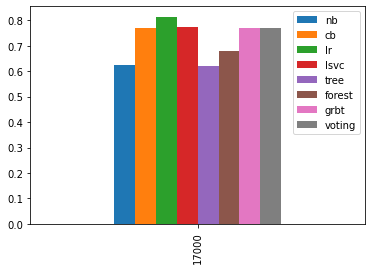

In [113]:
acc_models = {'nb':nb_acc, 
              'cb':cb_acc, 
              'lr':lr_acc, 
              'lsvc':lsvc_acc, 
              'tree':tree_acc, 
              'forest':forest_acc, 
              'grbt':grbt_acc,
              'voting':voting_acc}
pd.DataFrame(acc_models, index=['17000']).plot.bar()

In [115]:
acc_1 = pd.DataFrame(acc_models, index=['17000'])
acc_1

,nb,cb,lr,lsvc,tree,forest,grbt,voting
17000,0.625111,0.771149,0.813891,0.77293,0.620214,0.67854,0.771149,0.771149


---
#### 3-2 n_words = 25000

In [116]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=25000, test_split=0.2)

In [117]:
# 원래 뉴스 데이터 복원
# 제공 딕셔너리 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [118]:
# 인덱스 값 제정의
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [119]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [120]:
# 데이터를 텍스트로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [121]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [122]:
# 확인
x_train[:1]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']

In [123]:
# 확인
x_test[:1]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann <unk> of west germany reuter 3']

In [125]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [126]:
# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 22169)


In [127]:
# tf-idf 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 22169)


In [128]:
# 테스트 데이터 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 22169)


In [129]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [130]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
nb_acc = accuracy_score(y_test, predicted)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6064113980409617


In [131]:
# 컴플리트 나이브 베이지안 cnb
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [132]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
cb_acc = accuracy_score(y_test, predicted)
print("정확도:", cb_acc) #예측값과 실제값 비교

정확도: 0.7671415850400712


In [133]:
# 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [134]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
lr_acc = accuracy_score(y_test, predicted)
print("정확도:", lr_acc) #예측값과 실제값 비교

정확도: 0.8103294746215495


In [135]:
# 선형 서포트벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [136]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
lsvc_acc = accuracy_score(y_test, predicted)
print("정확도:", lsvc_acc) #예측값과 실제값 비교

정확도: 0.7787177203918076


In [137]:
# 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [138]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
tree_acc = accuracy_score(y_test, predicted)
print("정확도:", tree_acc) #예측값과 실제값 비교

정확도: 0.6233303650934996


In [139]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [140]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
forest_acc = accuracy_score(y_test, predicted)
print("정확도:", forest_acc) #예측값과 실제값 비교

정확도: 0.6487088156723063


In [141]:
# 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [142]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
grbt_acc = accuracy_score(y_test, predicted)
print("정확도:", grbt_acc) #예측값과 실제값 비교

정확도: 0.773820124666073


In [143]:
# 로지스틱, cnb, 그래디언트 부스팅 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [144]:
Apredicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
voting_acc = accuracy_score(y_test, predicted)
print("정확도:", voting_acc) #예측값과 실제값 비교

정확도: 0.773820124666073


<AxesSubplot:>

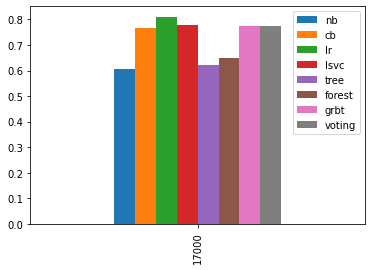

In [145]:
acc_models = {'nb':nb_acc, 
              'cb':cb_acc, 
              'lr':lr_acc, 
              'lsvc':lsvc_acc, 
              'tree':tree_acc, 
              'forest':forest_acc, 
              'grbt':grbt_acc,
              'voting':voting_acc}
pd.DataFrame(acc_models, index=['17000']).plot.bar()

In [147]:
acc_2 = pd.DataFrame(acc_models, index=['25000'])
acc_2

,nb,cb,lr,lsvc,tree,forest,grbt,voting
25000,0.606411,0.767142,0.810329,0.778718,0.62333,0.648709,0.77382,0.77382


---
#### 3-3 n_words = 2000

In [148]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=2000, test_split=0.2)

In [149]:
# 원래 뉴스 데이터 복원
# 제공 딕셔너리 로드
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [150]:
# 인덱스 값 제정의
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [151]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [152]:
# 데이터를 텍스트로 변환
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [153]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [154]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [155]:
# dtm 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 1944)


In [156]:
# tf-idf 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 1944)


In [157]:
# 테스트 데이터 변환
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 1944)


In [158]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

MultinomialNB()

In [159]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
nb_acc = accuracy_score(y_test, predicted)
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6914514692787177


In [160]:
# 컴플리트 나이브 베이지안 cnb
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [161]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
cb_acc = accuracy_score(y_test, predicted)
print("정확도:", cb_acc) #예측값과 실제값 비교

정확도: 0.7569011576135352


In [162]:
# 로지스틱 회귀
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000)

In [163]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
lr_acc = accuracy_score(y_test, predicted)
print("정확도:", lr_acc) #예측값과 실제값 비교

정확도: 0.7813891362422084


In [164]:
# 선형 서포트벡터 머신
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [165]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
lsvc_acc = accuracy_score(y_test, predicted)
print("정확도:", lsvc_acc) #예측값과 실제값 비교

정확도: 0.7355298308103295


In [166]:
# 결정 트리
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [167]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
tree_acc = accuracy_score(y_test, predicted)
print("정확도:", tree_acc) #예측값과 실제값 비교

정확도: 0.6255565449688335


In [168]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [169]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
forest_acc = accuracy_score(y_test, predicted)
print("정확도:", forest_acc) #예측값과 실제값 비교

정확도: 0.6954585930543188


In [170]:
# 그래디언트 부스팅 트리
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [171]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
grbt_acc = accuracy_score(y_test, predicted)
print("정확도:", grbt_acc) #예측값과 실제값 비교

정확도: 0.757346393588602


In [172]:
# 로지스틱, cnb, 그래디언트 부스팅 소프트 보팅
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [173]:
Apredicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
voting_acc = accuracy_score(y_test, predicted)
print("정확도:", voting_acc) #예측값과 실제값 비교

정확도: 0.757346393588602


<AxesSubplot:>

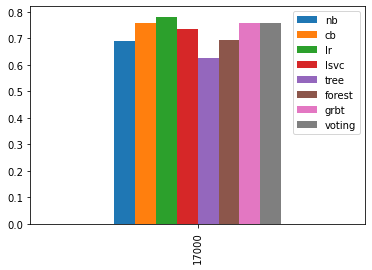

In [174]:
acc_models = {'nb':nb_acc, 
              'cb':cb_acc, 
              'lr':lr_acc, 
              'lsvc':lsvc_acc, 
              'tree':tree_acc, 
              'forest':forest_acc, 
              'grbt':grbt_acc,
              'voting':voting_acc}
pd.DataFrame(acc_models, index=['17000']).plot.bar()

In [175]:
acc_3 = pd.DataFrame(acc_models, index=['2000'])
acc_3

,nb,cb,lr,lsvc,tree,forest,grbt,voting
2000,0.691451,0.756901,0.781389,0.73553,0.625557,0.695459,0.757346,0.757346


<AxesSubplot:>

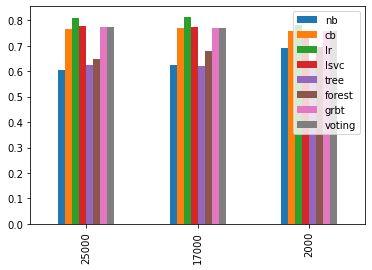

In [185]:
nword_comparison = pd.concat([acc_2, acc_1, acc_3])
nword_comparison.plot.bar()

In [186]:
nword_comparison

,nb,cb,lr,lsvc,tree,forest,grbt,voting
25000,0.606411,0.767142,0.810329,0.778718,0.623330,0.648709,0.773820,0.773820
17000,0.625111,0.771149,0.813891,0.772930,0.620214,0.678540,0.771149,0.771149
2000,0.691451,0.756901,0.781389,0.735530,0.625557,0.695459,0.757346,0.757346


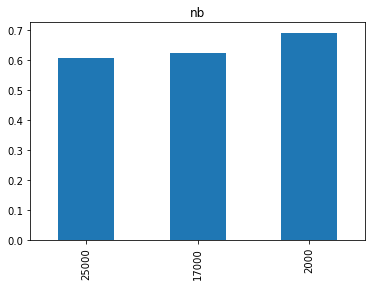

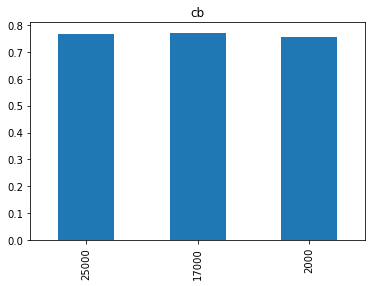

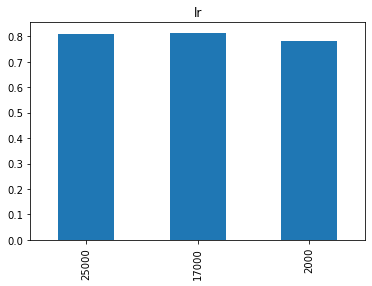

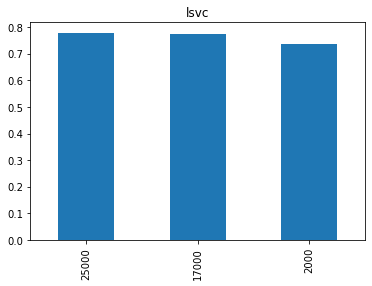

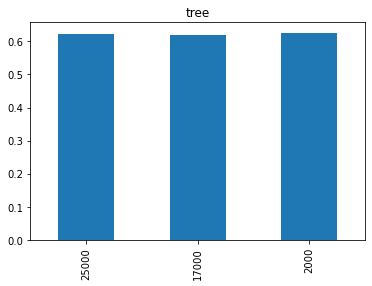

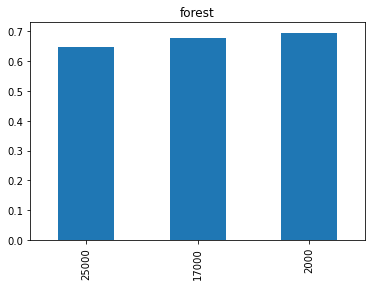

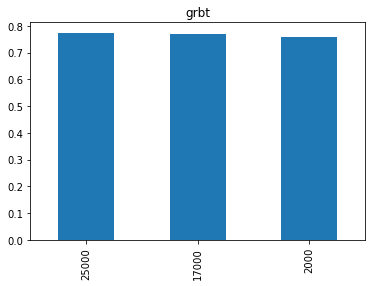

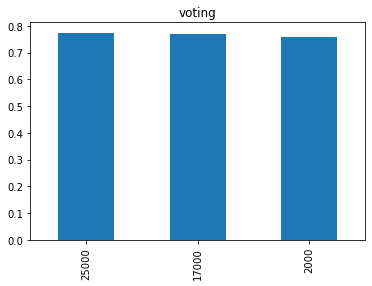

In [193]:
for i in nword_comparison.columns:
    nword_comparison[i].plot.bar(title=i)
    plt.show()

+ 전체 단어를 사용한 voting의 경우에 81.8%로 가장 높은 정확도를 보였다.

---
### 4. 딥러닝 모델과 비교해 보기

In [194]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

Data Size: 8982
문장의 최단 길이: 13
문장의 최장 길이: 2376
문장의 평균 길이: 145


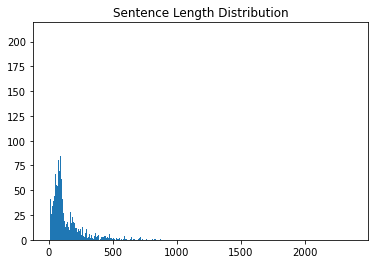

In [195]:
# 문장 길이 분포 확인
min_len = 999
max_len = 0
sum_len = 0

print("Data Size:", len(x_train))

for sen in x_train:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(x_train))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in x_train: 
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Data Size: 2246
문장의 최단 길이: 2
문장의 최장 길이: 1032
문장의 평균 길이: 147


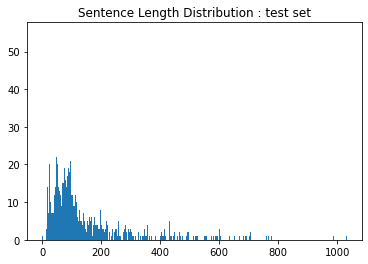

In [196]:
# 문장 길이 분포 확인
min_len = 999
max_len = 0
sum_len = 0

print("Data Size:", len(x_test))

for sen in x_test:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(x_test))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in x_test: 
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution : test set")
plt.show()

In [198]:
import tensorflow as tf
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen = maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen = maxlen)

In [201]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [239]:
# 모델 작성

embedding_size = 256
hidden_size = 256


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(index_to_word), embedding_size),# (Size of the vocabulary, Dimension of the dense embedding)
    tf.keras.layers.LSTM(hidden_size),
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 256)         7931392   
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 46)                11822     
Total params: 8,534,318
Trainable params: 8,534,318
Non-trainable params: 0
_________________________________________________________________


In [240]:
# 체크포인트
import os

checkpoint_dir = os.getenv('HOME')+'/aiffel/reuters_classification/models/lstm'

checkpoint_dir

'/home/ssac7/aiffel/reuters_classification/models/lstm'

In [241]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_acc',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              mode='auto',
                                              verbose=1,
                                              patience=10)

In [242]:
# model compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [243]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    callbacks=[early_stop, cp_callback], 
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/50
57/57 [==============================] - ETA: 0s - loss: 2.7417 - acc: 0.3162
Epoch 00001: val_acc improved from -inf to 0.34502, saving model to /home/ssac7/aiffel/reuters_classification/models/lstm
57/57 [==============================] - 6s 99ms/step - loss: 2.7417 - acc: 0.3162 - val_loss: 2.4342 - val_acc: 0.3450
Epoch 2/50
57/57 [==============================] - ETA: 0s - loss: 2.4244 - acc: 0.3527
Epoch 00002: val_acc did not improve from 0.34502
57/57 [==============================] - 5s 91ms/step - loss: 2.4244 - acc: 0.3527 - val_loss: 2.3912 - val_acc: 0.3450
Epoch 3/50
57/57 [==============================] - ETA: 0s - loss: 2.4036 - acc: 0.3534
Epoch 00003: val_acc did not improve from 0.34502
57/57 [==============================] - 6s 97ms/step - loss: 2.4036 - acc: 0.3534 - val_loss: 2.3859 - val_acc: 0.3450
Epoch 4/50
57/57 [==============================] - ETA: 0s - loss: 2.3923 - acc: 0.3534
Epoch 00004: val_acc did not improve from 0.34502
57/57 [=====

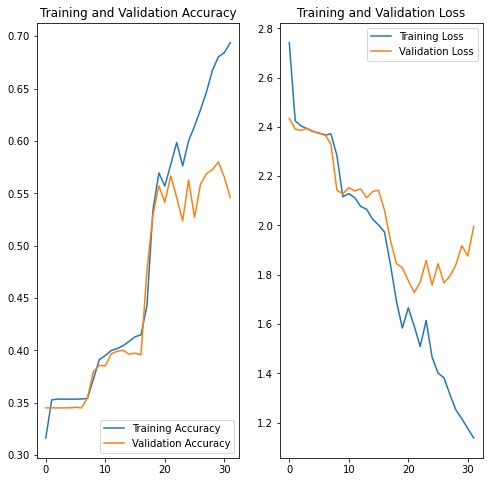

In [244]:
# trainig porgress plot
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [245]:
model.load_weights(checkpoint_dir)
model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 2.0315 - acc: 0.5788


[2.0314829349517822, 0.5788067579269409]

+ 단어를 모두 쓴 것에 비해 데이터 수가 적어서 딥러닝 학습이 잘 안되는 것 같다. 
+ 데이터가 부족할 때는 단어를 줄여서 학습을 시키거나 단어가 적어질수록 성능이 향상 된 로지스틱회귀 모형을 사용하는 것이 좋을 것 같다.